#### Jupyter notebooks

This is a [Jupyter](http://jupyter.org/) notebook using Python.  You can install Jupyter locally to edit and interact with this notebook.

# Finite difference/collocation methods

Consider the boundary value problem

$$ \begin{gather} -\frac{d^2 u}{dx^2} = f(x) \quad x \in \Omega = (-1,1) \\
u(-1) = a \quad \frac{du}{dx}(1) = b . \end{gather} $$

$f(x)$ is the "forcing" term and we have a Dirichlet boundary condition at the left end of the domain and a Neumann condition on the right end.  We need to choose
* how to represent $u(x)$, including evaluating it on the boundary,
* how to compute derivatives of $u$,
* in what sense to ask for the differential equation to be satisfied,
* where to evaluate $f(x)$ or integrals thereof,
* how to enforce boundary conditions.

## The framework

* Finite difference (FD) methods choose to represent the function $u(x)$ by its values $u_i = u(x_i)$ at a discrete set of points $$ -1 = x_0 < x_1 < \dotsb < x_n = 1 . $$
The FD framework does not uniquely specify the solution values at points outside this discrete set.
* FD computes derivatives at $x_i$ via differencing formulas involving a finite number of neighbor points (independent of the total number of points $n$).  This will be our main focus.
* FD methods ask for the differential equation to be satisfied pointwise at each $x_i$ in the interior of the domain.
* FD methods evaluate the forcing term $f$ pointwise at $x_i$.
* FD methods approximate derivatives at discrete boundary points ($x_n = 1$ above), typically using one-sided differencing formulas.

## Differencing formulas

How can we compute $\frac{du}{dx}(x_i)$ using $u_i$ and $u_{i+1}$?  How accurate is this approximation?

### Taylor series

Without loss of generality, we may assume $x_i = 0$ by shifting our function.  For notational convenience, we will also define $h = x_{i+1} - x_i$.
To determine the order of accuracy, we represent the function $u(x)$ by its Taylor series
$$ u(x) = u(0) + u'(0)x + u''(0)x^2/2! + O(x^3)$$
and substitute into the differencing formula
$$ \begin{split} u'(0) \approx \frac{u(h) - u(0)}{h} = h^{-1} \Big( u(0) + u'(0) h + u''(0)h^2/2 + O(h^3) - u(0) \Big) \\
= u'(0) + u''(0)h/2 + O(h^2) . \end{split}$$
Evidently the error in this approximation is $u''(0)h/2 + O(h^2)$. We say this method is *first order accurate*.

* Is the centered difference formula better?
* Stability: are there "rough" functions for which this differencing formula estimates $u'(x_i) = 0$?

### Second derivatives

We will need at least three grid points to compute a second derivative.
* Why?

Again, there is more than one possible approach.
* One method is to use a first derivative formula to compute $u'(x_{i+1})$ and $u'(x_{i-1})$, then apply the centered first derivative again.
* Another is to define some "staggered" points $x_{i+1/2}$ and $x_{i-1/2}$.

Why should we choose one over the other? Can we understand this in terms of accuracy and stability?

<IPython.core.display.Javascript object>


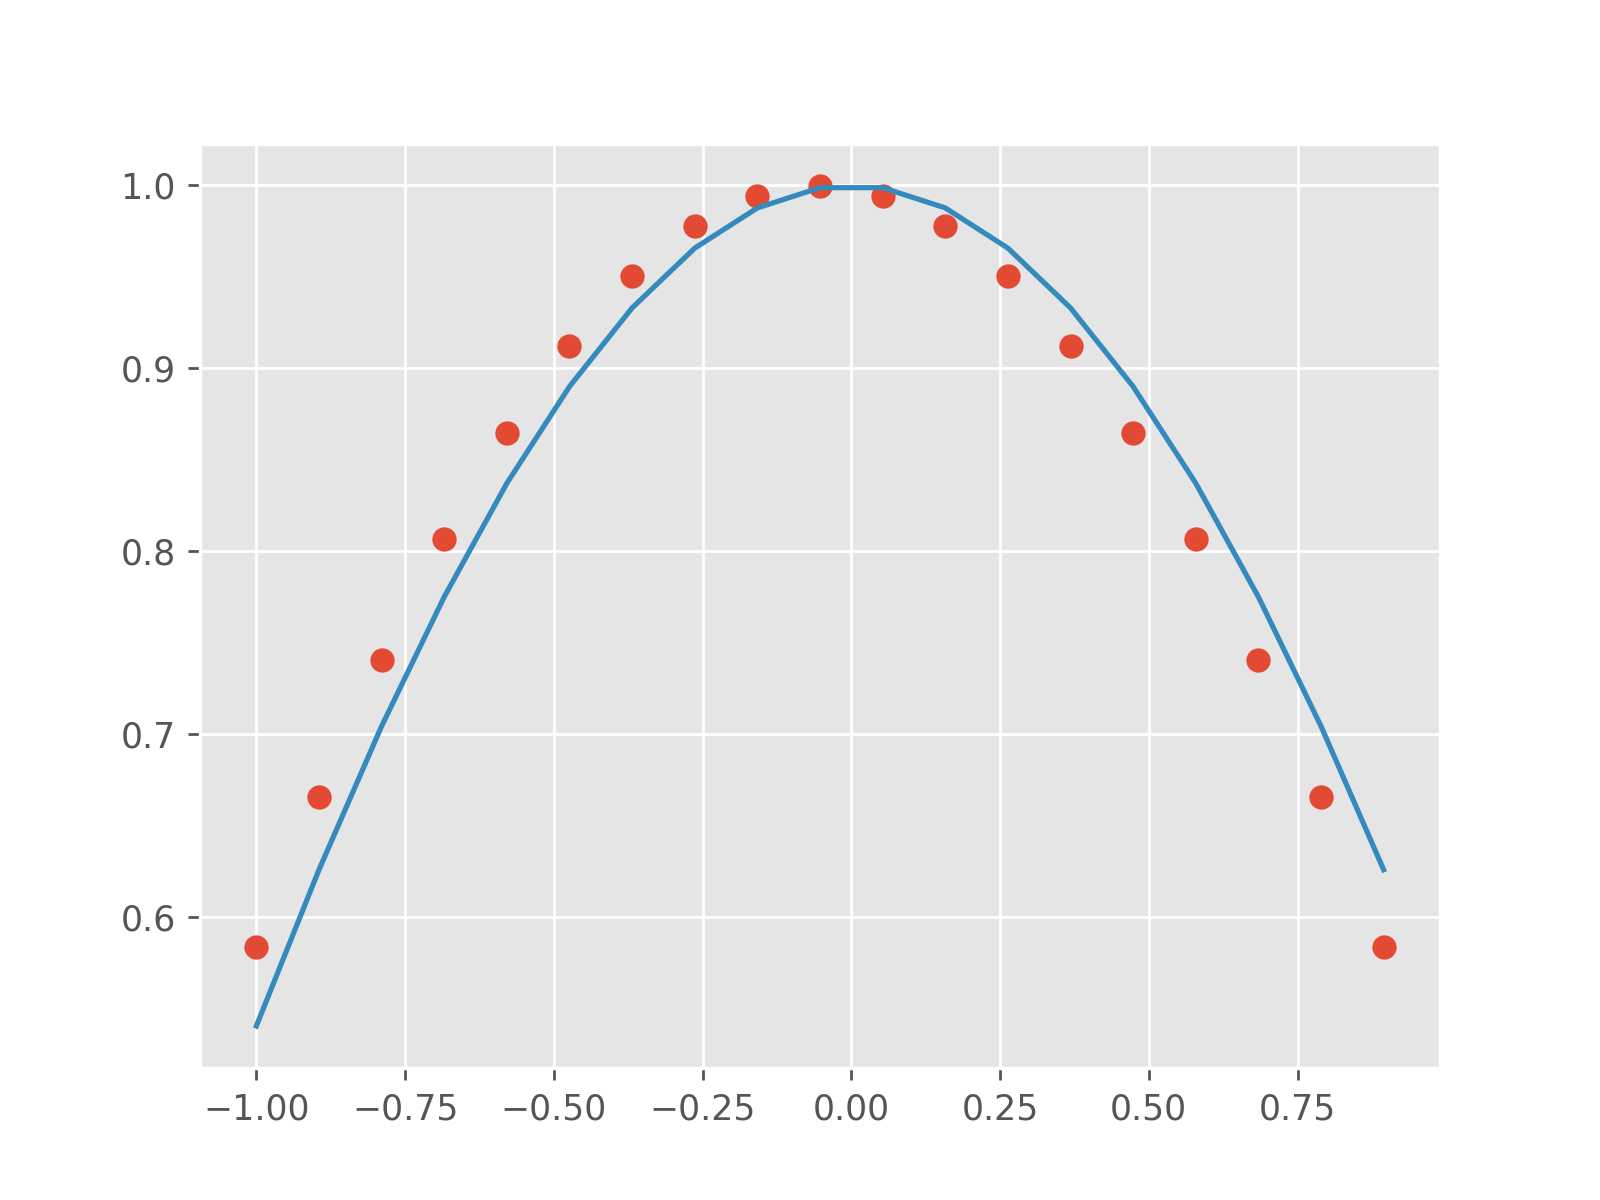

In [1]:
%matplotlib notebook
import numpy
from matplotlib import pyplot
pyplot.style.use('ggplot')

n = 20
h = 2/(n-1)
x = numpy.linspace(-1,1,n)
u = numpy.sin(x)
pyplot.figure()
pyplot.plot(x[:-1], (u[1:] - u[:-1]) / h, 'o')
pyplot.plot(x[:-1], numpy.cos(x[:-1]))